In [1]:
%matplotlib notebook
import numpy as np
import pandas as pd 
import glob
import matplotlib.pyplot as plt

In [2]:
def read_fieldfox(file):
    data = np.array(pd.read_csv(file,skiprows = 32))
    freq = data[:-1,0].astype(float)
    power= data[:-1,1].astype(float)
    return freq, power

def read_rtsa_file(rx_files):
    final_df = []
    for file in rx_files:
        data = pd.read_csv(file,skiprows = 17,header=None)
        data=data.drop([0,2,3,4],axis=1)
        with open(file,'r') as f:
            for i,line in enumerate(f):
                if 'Freq Hz' in line:
                    break
        cols=line.split(',')[5:]
        cols = ['Datetime'] + cols
        data.columns=cols
        final_df.append(data)  
    return pd.concat(final_df,ignore_index=True)

In [3]:
files = glob.glob('F*.csv')
files

['File_CH_TTX_OFF.csv', 'File_CH_TTX_ON.csv', 'File_TTX.csv']

<IPython.core.display.Javascript object>


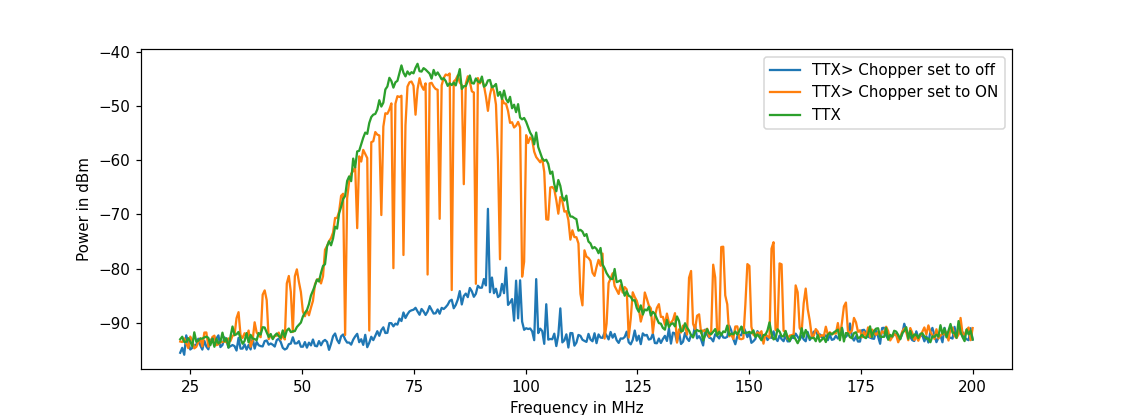

Text(0, 0.5, 'Power in dBm')

In [4]:
labels = ['TTX> Chopper set to off', 'TTX> Chopper set to ON', 'TTX']
for i in range(len(files)):
    freq, power = read_fieldfox(files[i])
    plt.plot(freq/1e6, power, label = labels[i])

plt.legend()
plt.xlabel('Frequency in MHz')
plt.ylabel('Power in dBm')

In [5]:
rtsa_files = glob.glob('RTAutosession22_chopper_titu_tx/*.csv')
rtsa_files

['RTAutosession22_chopper_titu_tx/0.csv',
 'RTAutosession22_chopper_titu_tx/1.csv']

In [6]:
final_df = []
for file in rtsa_files:
    data = pd.read_csv(file,skiprows = 17,header=None)
    data=data.drop([0,2,3,4],axis=1)
    with open(file,'r') as f:
        for i,line in enumerate(f):
            if 'Freq Hz' in line:
                break
    cols=line.split(',')[5:]
    cols = ['Datetime'] + cols
    data.columns=cols
    final_df.append(data)  

/home/mrudula/.local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
rtsa_df = pd.concat(final_df, ignore_index = True)
rtsa_df['Datetime'] = pd.to_datetime(rtsa_df['Datetime'])

<IPython.core.display.Javascript object>


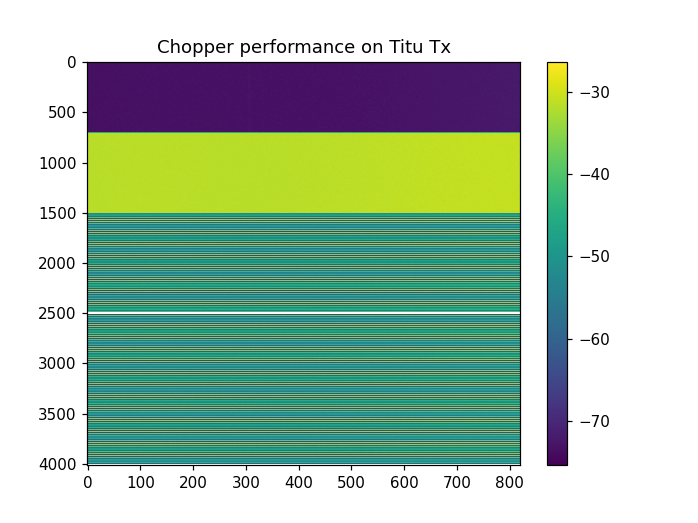

In [8]:
plt.figure()
plt.title('Chopper performance on Titu Tx')
plt.imshow(rtsa_df.iloc[:,2:], aspect = 'auto')
plt.colorbar()

<IPython.core.display.Javascript object>


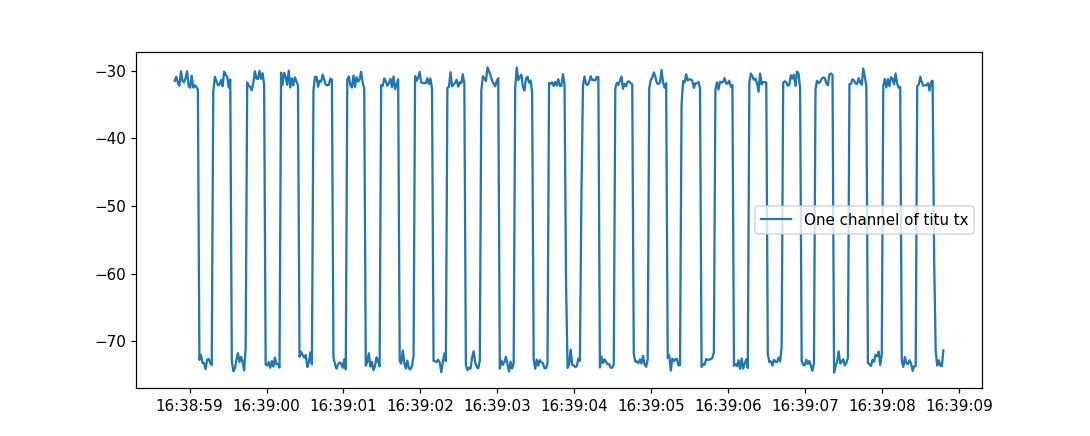

In [9]:
plt.figure(figsize= (10,4))
plt.plot(rtsa_df.iloc[1500:2000,0],rtsa_df.iloc[1500:2000,400], label = 'One channel of titu tx')
plt.legend()